In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

DATA COLLECTION

In [2]:
now = datetime.now()

start = datetime(now.year-10,now.month,now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\sahil\AppData\Local\Temp\ipykernel_31484\823477014.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200
2015-08-25,23.313032,24.969260,23.259098,24.969260,414406400
2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400
2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400
2015-08-28,25.459160,25.463654,25.065890,25.207467,212657600
...,...,...,...,...,...
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2515, 5)

In [5]:
df.isna().sum() #check for null value 

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,105.964630,107.029459,104.791391,105.864675,1.072366e+08
std,69.503130,70.187336,68.740314,69.431737,6.176270e+07
min,20.624050,20.927682,20.425436,20.546432,2.323470e+07
25%,40.008661,40.400929,39.673054,39.979280,6.549675e+07
50%,108.166222,109.780901,106.181849,108.574755,9.277080e+07
75%,167.039505,168.387286,165.519282,167.280742,1.302284e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200
2015-08-25,23.313032,24.969260,23.259098,24.969260,414406400
2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400
2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400
2015-08-28,25.459160,25.463654,25.065890,25.207467,212657600


In [9]:
df=df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200
1,2015-08-25,23.313032,24.969260,23.259098,24.969260,414406400
2,2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400
3,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400
4,2015-08-28,25.459160,25.463654,25.065890,25.207467,212657600


Text(0, 0.5, 'Close Price')

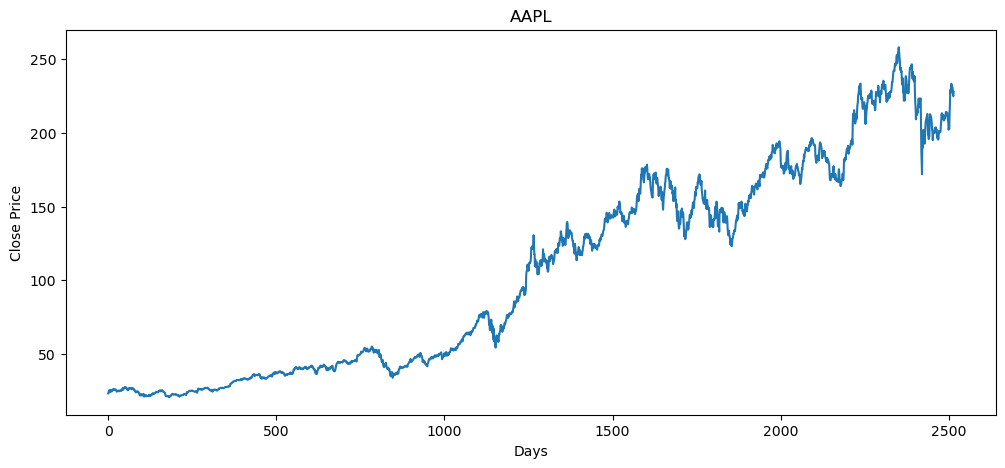

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

Feature Engineering

In [12]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> null null null null 30  40 

In [13]:
temp_df=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [14]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [15]:
df1['MA_5']=df1.rolling(5).mean()#rolling is function that will hepl us to calculate moving average
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


100 days moving average

In [16]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN
1,2015-08-25,23.313032,24.969260,23.259098,24.969260,414406400,NaN
2,2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400,NaN
3,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN
4,2015-08-28,25.459160,25.463654,25.065890,25.207467,212657600,NaN


In [17]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN
1,2015-08-25,23.313032,24.969260,23.259098,24.969260,414406400,NaN
2,2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400,NaN
3,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN
4,2015-08-28,25.459160,25.463654,25.065890,25.207467,212657600,NaN
...,...,...,...,...,...,...,...
98,2016-01-13,21.979713,22.837327,21.959402,22.640978,249758400,NaN
99,2016-01-14,22.460421,22.677082,21.607322,22.108349,252680400,25.303905
100,2016-01-15,21.921024,22.051923,21.521558,21.711135,319335600,25.291378


Text(0, 0.5, 'Close Price')

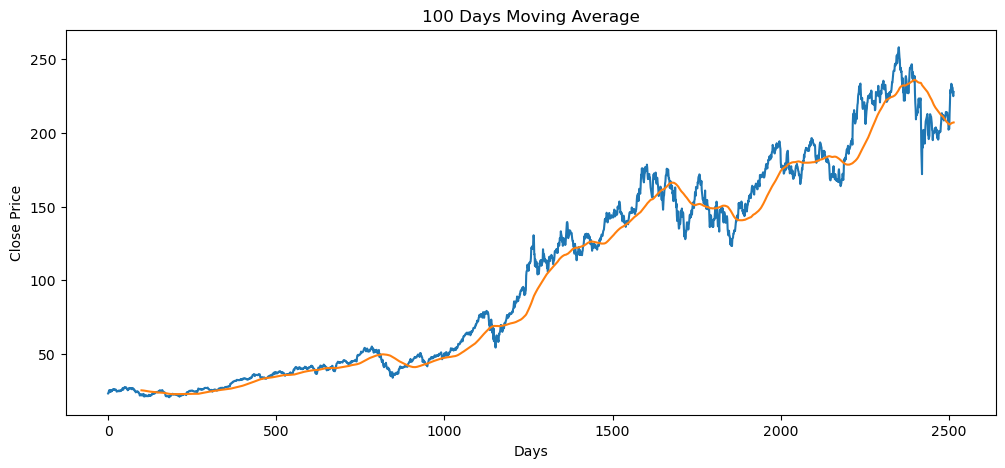

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'])
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')


#200 Days of moving average

In [19]:
df['MA_200']=df.Close.rolling(200).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN,NaN
1,2015-08-25,23.313032,24.969260,23.259098,24.969260,414406400,NaN,NaN
2,2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400,NaN,NaN
3,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN,NaN
4,2015-08-28,25.459160,25.463654,25.065890,25.207467,212657600,NaN,NaN


Text(0, 0.5, 'Close Price')

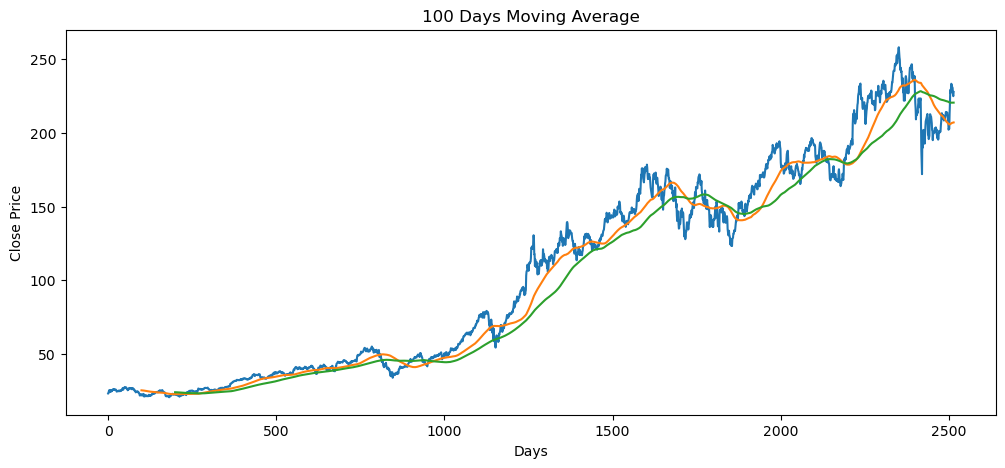

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'])
plt.plot(df['MA_200'])
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')


### calculating % changes in each trading session

In [21]:
df['Percentage Change'] = df.Close.pct_change()
df[['Close', 'Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
0,23.173700,NaN
1,23.313032,0.006012
2,24.650146,0.057355
3,25.376009,0.029447
4,25.459160,0.003277
...,...,...
2510,230.889999,-0.003023
2511,230.559998,-0.001429
2512,226.009995,-0.019735


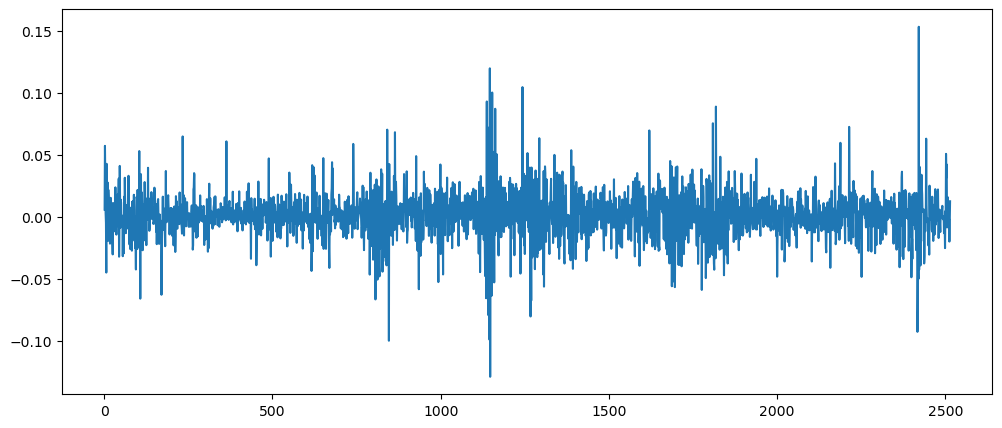

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])

###Data Processing

In [23]:
df.shape

(2515, 9)

#spliting data into training & testing dtasets

In [24]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[0:int(len(df)*0.7) : int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        23.173700
1        23.313032
2        24.650146
3        25.376009
4        25.459160
...            ...
1755    169.425537
1756    170.498596
1757    170.341095
1758    171.837448
1759    171.443680

[1760 rows x 1 columns]
Ticker     AAPL
0       23.1737


In [25]:
data_training

Ticker,AAPL
0,23.173700
1,23.313032
2,24.650146
3,25.376009
4,25.459160
...,...
1755,169.425537
1756,170.498596
1757,170.341095
1758,171.837448


In [26]:
data_testing

Ticker,AAPL
0,23.1737


#Scaling down the data between 0 and 1

In [27]:
type(df)

pandas.core.frame.DataFrame

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))  # you can adjust the range
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01615552],
       [0.01703838],
       [0.02551083],
       ...,
       [0.94866242],
       [0.95814386],
       [0.9556488 ]], shape=(1760, 1))

In [29]:
type(data_training_array)

numpy.ndarray

In [30]:
data_training_array.shape

(1760, 1)

5.sequence Creation

In [31]:
12, 13, 14, 15, 16, 17, 18, 19, 20

(12, 13, 14, 15, 16, 17, 18, 19, 20)

In [32]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [33]:
x_train

array([[[0.01615552],
        [0.01703838],
        [0.02551083],
        ...,
        [0.01226516],
        [0.00858998],
        [0.01163592]],

       [[0.01703838],
        [0.02551083],
        [0.03011016],
        ...,
        [0.00858998],
        [0.01163592],
        [0.00821811]],

       [[0.02551083],
        [0.03011016],
        [0.03063704],
        ...,
        [0.01163592],
        [0.00821811],
        [0.00754604]],

       ...,

       [[0.92804311],
        [0.95205288],
        [0.95609607],
        ...,
        [0.92034242],
        [0.94286111],
        [0.9496604 ]],

       [[0.95205288],
        [0.95609607],
        [0.96156952],
        ...,
        [0.94286111],
        [0.9496604 ],
        [0.94866242]],

       [[0.95609607],
        [0.96156952],
        [0.98246921],
        ...,
        [0.9496604 ],
        [0.94866242],
        [0.95814386]]], shape=(1660, 100, 1))

In [34]:
x_train.ndim

3

In [35]:
y_train.ndim

1

In [36]:
y_train.shape

(1660,)

6.Bulding Machin Learning Model

In [37]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [42]:
#ML Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [41]:
model = Sequential()
model.add(Input(shape=(100,1))) #model expecting 100 days price 1 is feature menas closing price
model.add(LSTM(units=128,activation='tanh', return_sequences=True)) #passing 128 lstm means neurons
model.add(LSTM(units=64)) #64 neurons
model.add(Dense(25)) 
#Dense layer will take single output from previous input and analyses into 25 different way
model.add(Dense(1)) #final 1 output

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0106
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.8017e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.1588e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.2218e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.8767e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.5335e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.2924e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.1573e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 4.3314e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.8558e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.6000e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.8988e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 4.1313e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.2155e-04
Epoch 15/50
52/52 ━

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                 │ (None, 100, 128)      │       66,560 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_5 (LSTM)                 │ (None, 64)            │       49,408 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 25)            │        1,625 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 1)             │           26 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [48]:
#save the train model
model.save('Stock_Prediction_model.keras')

8.Preparing test data

In [50]:
data_testing

Ticker,AAPL
0,23.1737


In [52]:
data_training.tail(200)

Ticker,AAPL
1560,146.865692
1561,148.304810
1562,147.785919
1563,148.315353
1564,147.491821
...,...
1755,169.425537
1756,170.498596
1757,170.341095
1758,171.837448


In [53]:
past_100_days=data_training.tail(150)

In [54]:
past_100_days


Ticker,AAPL
1610,168.815567
1611,169.678375
1612,166.472412
1613,162.972366
1614,161.286072
...,...
1755,169.425537
1756,170.498596
1757,170.341095
1758,171.837448


In [55]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,168.815567
1,169.678375
2,166.472412
3,162.972366
4,161.286072
...,...
146,170.498596
147,170.341095
148,171.837448
149,171.443680


In [57]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.9550114 ],
       [0.96066905],
       [0.93964673],
       [0.91669602],
       [0.90563855],
       [0.89213842],
       [0.88705968],
       [0.87523058],
       [0.87465196],
       [0.87163047],
       [0.94305403],
       [0.97166179],
       [0.97056898],
       [0.97847639],
       [0.95957574],
       [0.9577094 ],
       [0.95301028],
       [0.97341547],
       [0.98274897],
       [0.95597123],
       [0.93357073],
       [0.9351155 ],
       [0.96028374],
       [0.95873898],
       [0.9351155 ],
       [0.92494512],
       [0.90576312],
       [0.87840616],
       [0.89559284],
       [0.90917472],
       [0.91091249],
       [0.8985537 ],
       [0.92018166],
       [0.91805738],
       [0.89836049],
       [0.87344949],
       [0.86147691],
       [0.8969445 ],
       [0.86842879],
       [0.84403278],
       [0.81757671],
       [0.84634997],
       [0.87531633],
       [0.88194633],
       [0.9035744 ],
       [0.91258613],
       [0.93472928],
       [0.943

In [58]:
input_data.shape

(151, 1)

In [59]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    

In [61]:
x_test,y_test=np.array(x_test),np.array(y_test)


In [62]:
x_test

array([[[0.9550114 ],
        [0.96066905],
        [0.93964673],
        ...,
        [0.78522236],
        [0.7901216 ],
        [0.80668874]],

       [[0.96066905],
        [0.93964673],
        [0.91669602],
        ...,
        [0.7901216 ],
        [0.80668874],
        [0.80185384]],

       [[0.93964673],
        [0.91669602],
        [0.90563855],
        ...,
        [0.80668874],
        [0.80185384],
        [0.76755911]],

       ...,

       [[0.96852334],
        [0.97270747],
        [0.97837173],
        ...,
        [0.95901113],
        [0.96604746],
        [0.96501468]],

       [[0.97270747],
        [0.97837173],
        [1.        ],
        ...,
        [0.96604746],
        [0.96501468],
        [0.97482665]],

       [[0.97837173],
        [1.        ],
        [0.99234013],
        ...,
        [0.96501468],
        [0.97482665],
        [0.97224461]]], shape=(51, 100, 1))

In [63]:
y_test

array([0.80185384, 0.76755911, 0.73203939, 0.6981957 , 0.70386857,
       0.72108047, 0.68646326, 0.69613285, 0.72391696, 0.72056489,
       0.73938799, 0.76124168, 0.76124168, 0.7340379 , 0.74557684,
       0.72939641, 0.74364276, 0.76059702, 0.76936401, 0.79147525,
       0.79592323, 0.78193463, 0.78831669, 0.78593126, 0.80514158,
       0.81610039, 0.79611684, 0.82145118, 0.83460171, 0.84949292,
       0.84137039, 0.83402149, 0.82531873, 0.8587755 , 0.86238552,
       0.89564908, 0.88920258, 0.87953318, 0.9189851 , 0.91692225,
       0.91543772, 0.91233899, 0.91266167, 0.94054903, 0.93570743,
       0.95901113, 0.96604746, 0.96501468, 0.97482665, 0.97224461,
       0.        ])

9.Making prediction

In [64]:
y_predict=model.predict(x_test)
y_predict

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step


array([[0.7788573 ],
       [0.7832804 ],
       [0.7647775 ],
       [0.7324853 ],
       [0.69751775],
       [0.68659884],
       [0.69731534],
       [0.6874276 ],
       [0.68516237],
       [0.7011794 ],
       [0.7096103 ],
       [0.7219267 ],
       [0.7396301 ],
       [0.7473696 ],
       [0.7319368 ],
       [0.7267193 ],
       [0.71685153],
       [0.72039557],
       [0.7349099 ],
       [0.74894655],
       [0.7679354 ],
       [0.7792945 ],
       [0.77377504],
       [0.7713688 ],
       [0.7691829 ],
       [0.7797457 ],
       [0.7932433 ],
       [0.7876249 ],
       [0.7967538 ],
       [0.8109126 ],
       [0.82646286],
       [0.8278144 ],
       [0.8208042 ],
       [0.8108157 ],
       [0.82649195],
       [0.8398458 ],
       [0.86516213],
       [0.8731548 ],
       [0.8665777 ],
       [0.88499326],
       [0.89484245],
       [0.89595985],
       [0.8926134 ],
       [0.8906163 ],
       [0.9075965 ],
       [0.9144505 ],
       [0.9299597 ],
       [0.941

In [65]:
x_test

array([[[0.9550114 ],
        [0.96066905],
        [0.93964673],
        ...,
        [0.78522236],
        [0.7901216 ],
        [0.80668874]],

       [[0.96066905],
        [0.93964673],
        [0.91669602],
        ...,
        [0.7901216 ],
        [0.80668874],
        [0.80185384]],

       [[0.93964673],
        [0.91669602],
        [0.90563855],
        ...,
        [0.80668874],
        [0.80185384],
        [0.76755911]],

       ...,

       [[0.96852334],
        [0.97270747],
        [0.97837173],
        ...,
        [0.95901113],
        [0.96604746],
        [0.96501468]],

       [[0.97270747],
        [0.97837173],
        [1.        ],
        ...,
        [0.96604746],
        [0.96501468],
        [0.97482665]],

       [[0.97837173],
        [1.        ],
        [0.99234013],
        ...,
        [0.96501468],
        [0.97482665],
        [0.97224461]]], shape=(51, 100, 1))

In [66]:
y_predict=scaler.inverse_transform(y_predict.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
y_predict

array([141.95158, 142.62611, 139.80437, 134.87973, 129.54707, 127.88191,
       129.5162 , 128.0083 , 127.66285, 130.10548, 131.39122, 133.26952,
       135.96933, 137.14963, 134.79608, 134.0004 , 132.49553, 133.03601,
       135.24948, 137.3901 , 140.28596, 142.01826, 141.17653, 140.80957,
       140.47621, 142.08707, 144.1455 , 143.28867, 144.68085, 146.8401 ,
       149.21156, 149.41768, 148.3486 , 146.82533, 149.216  , 151.2525 ,
       155.11331, 156.3322 , 155.32918, 158.1376 , 159.63963, 159.81004,
       159.2997 , 158.99513, 161.58466, 162.62993, 164.9951 , 166.74123,
       167.12039, 167.89781, 167.93481], dtype=float32)

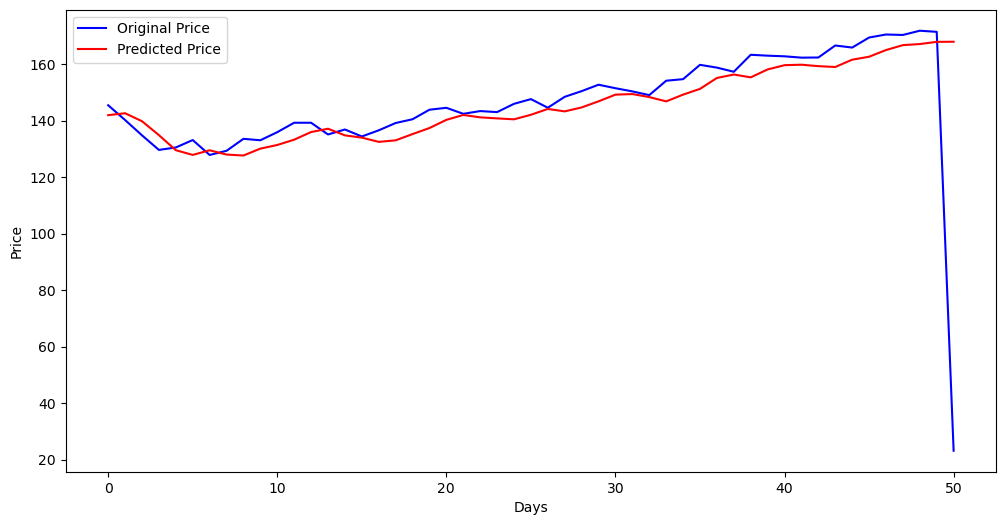

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label='Original Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()



10.Model evalution

In [80]:
#Mean Square Error(MSE)
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_predict)
print(f"Mean Square Error(MSE):{mse}")

Mean Square Error(MSE):430.92372696247475


In [78]:
#Root Mean Squared Error(RMSE)

rmse=np.sqrt(mse)
print(f"Root Mean Square Error(RMSE):{rmse}")

Root Mean Square Error(RMSE):20.75870243927772


In [84]:
#R-squared
r2=r2_score(y_test,y_predict)
print(f"R-squared:{r2}")

R-squared:0.06919731554562991
